In [1]:
import numpy as np
import pandas as pd

tweaked_results = '../data/TweakedResults2017-12-8.xls'
data = pd.read_excel(tweaked_results,
                     usecols = "A, N, O, P, Q")

data['Litter'] =   [x[:2] for x in data['Image Name']]
data['AnimalID'] = [x[:4] for x in data['Image Name']]

#data.head()

In [2]:
key = pd.read_excel('../data/genotypingkey.xlsx')
#key.head()

In [3]:
df = pd.merge(left = data, right = key,
                        how = 'inner',
                        left_on =  'AnimalID',
                        right_on = 'AnimalID'
                       )
## Drop unneeded columns
df.drop('Litter_y',   axis = 1, inplace = True)
df.drop('ID',         axis = 1, inplace = True)
df.drop('Image Name', axis = 1, inplace = True)

df.rename(columns = {'Litter_x':'Litter'},
                    inplace = True)

df['Branch Per Vessel Length'] = df['Total Number of Junctions']/df['Total Vessels Length']
#df.head()

In [4]:
data_mean = (df
             .set_index(['Litter', 'Genotype']) # pivot
             .sort_index(level = ['Litter', 'Genotype'])
             .mean(level = ['Litter', 'Genotype'])
            )
data_mean

Vessels percentage area  Total Number of Junctions  \
Litter Genotype                                                       
35     +/+                     60.593365                 153.000000   
       DEE/DEE                 53.619241                 132.333333   
36     +/+                     64.298531                 171.666667   
       DEE/DEE                 62.152266                 136.833333   
37     +/+                     58.682159                 110.000000   
       DEE/+                   61.730806                 161.000000   
       DEE/DEE                 54.291983                  98.333333   
39     +/+                     56.754883                 163.400000   
       DEE/+                   55.086328                 119.666667   
       DEE/DEE                 50.380391                 118.400000   
40     +/+                     55.955666                 177.000000   
       DEE/+                   51.474604                 111.250000   
       DEE/DEE                 51.083114                 116.400000   
41     +/+                     49.744407                 106.200000   
       DEE/DEE                 49.865152                  91.333333   

                 Junctions density  Total Vessels Length  \
Litter Genotype                                            
35     +/+              212.725079             15.531183   
       DEE/DEE          185.499823             13.567400   
36     +/+              237.625754             16.085692   
       DEE/DEE          190.815668             14.415517   
37     +/+              152.771378             13.102471   
       DEE/+            224.650218             15.673020   
       DEE/DEE          137.069635             12.666500   
39     +/+              226.433326             15.476645   
       DEE/+            166.699910             13.478515   
       DEE/DEE          165.404923             12.999469   
40     +/+              245.781790             16.085500   
       DEE/+            154.939201             12.847697   
       DEE/DEE          161.893606             13.234076   
41     +/+              150.792023             11.683795   
       DEE/DEE          128.593685             11.323804   

                 Branch Per Vessel Length  
Litter Genotype                            
35     +/+                       9.780884  
       DEE/DEE                   9.760158  
36     +/+                      10.619454  
       DEE/DEE                   9.383569  
37     +/+                       8.354406  
       DEE/+                    10.272319  
       DEE/DEE                   7.636818  
39     +/+                      10.533119  
       DEE/+                     8.865393  
       DEE/DEE                   9.032996  
40     +/+                      10.969989  
       DEE/+                     8.634773  
       DEE/DEE                   8.732405  
41     +/+                       8.951091  
       DEE/DEE                   7.953306

In [5]:
wild =   data_mean.xs('+/+',     level = 'Genotype')
mutant = data_mean.xs('DEE/DEE', level = 'Genotype')

In [6]:
from scipy import stats

t_stat, p_val = stats.ttest_rel(wild['Branch Per Vessel Length'],
                               mutant['Branch Per Vessel Length'])

print("p-value for branch per vessel length: {:f}".format(p_val))

p-value for branch per vessel length: 0.014510


## Before averaging within litter/genotype

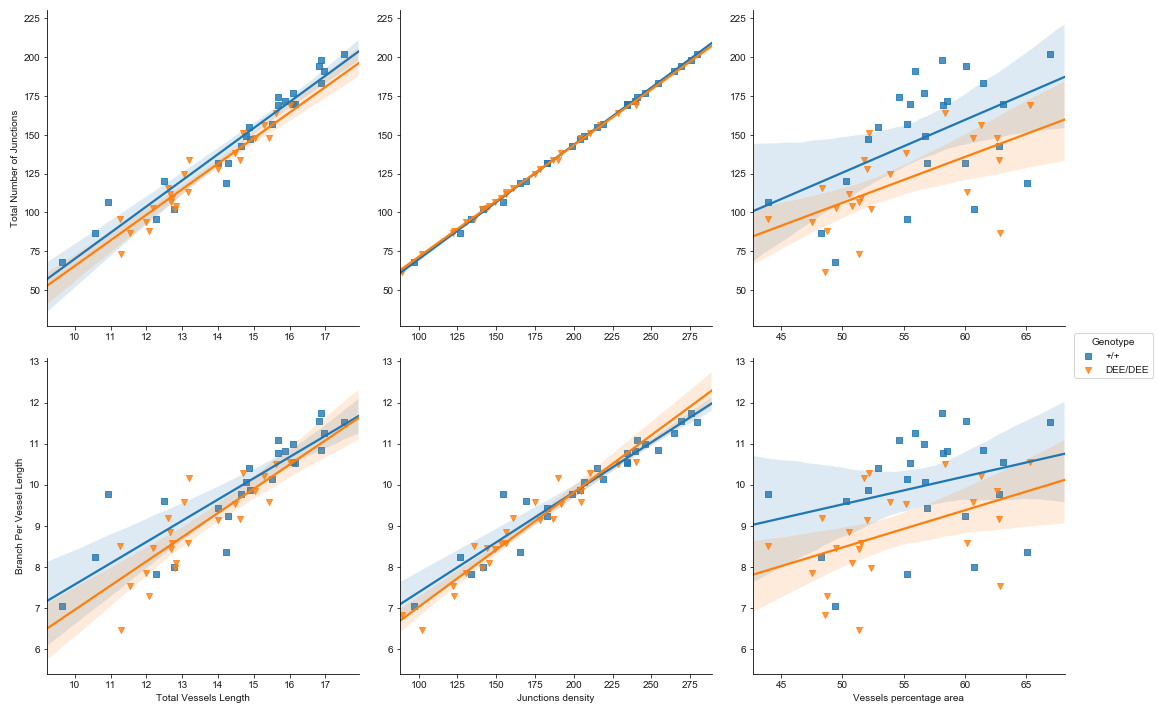

In [7]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import seaborn as sns


#sns.set(style='ticks', color_codes=True)

sns.pairplot(df,
             hue = 'Genotype',
             hue_order = ['+/+', 'DEE/DEE'],
             #vars=['Total Vessels Length',
             #      'Junctions density',
             #      'Branch Per Vessel Length',
             #     'Total Number of Junctions'],
             x_vars=['Total Vessels Length', 'Junctions density', 'Vessels percentage area'],
             y_vars=['Total Number of Junctions', 'Branch Per Vessel Length'],
             markers=['s', 'v'],
             kind='reg',
             size=5,
            )

sns.set(style="white", color_codes=True)
#sns.set_context("talk")

In [8]:
data_mean.reset_index(inplace=True)
#data_mean

## After averaging over litter/genotype

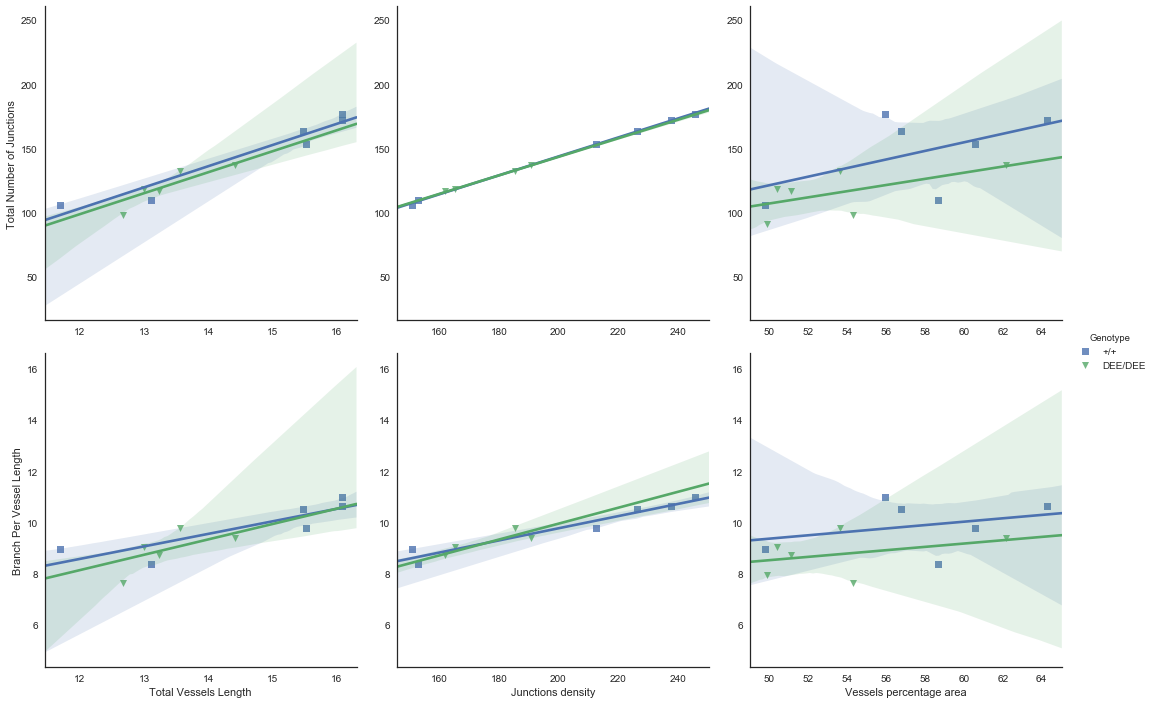

In [12]:
sns.pairplot(data_mean,
             hue = 'Genotype',
             hue_order = ['+/+', 'DEE/DEE'],
             #vars=['Total Vessels Length',
             #      'Junctions density',
             #      'Branch Per Vessel Length',
             #     'Total Number of Junctions'],
             x_vars=['Total Vessels Length', 'Junctions density', 'Vessels percentage area'],
             y_vars=['Total Number of Junctions', 'Branch Per Vessel Length'],
             markers=['s', 'v'],
             kind='reg',
             size=5,
            )